# Nova Análise
Para manter o histórico, criei uma nova análise das formulação com Python

In [282]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [283]:
# Variáveis Globais
RANDOM_STATE = 42
PDI_CORTE_NANO = 0.35 # até 0.35 de PDI
TAMANHO_CORTE_NANO = 300 # Até 300 nanometros

In [284]:
df = pd.read_csv('FormulacoesNano.csv', sep=';')

df.columns = [x.lower() for x in df.columns]
df.drop(columns=['manteiga_1', 'manteiga_2', 'formulacao', 'oleo', 'translucida', 'pontodenuvem'], inplace=True)

df.fillna(0, inplace=True)
df.head()

,perc_lipidio1,perc_lipidio2,perc_tensoativo,pdi,tamanho,lipidio1,pontofusao1,perc_ac_palmitico1,perc_ac_estearico1,perc_ac_oleico1,...,perc_ac_caprico2,perc_ac_laurico2,perc_ac_miristico2,perc_ac_palmitoleico2,perc_ac_beenico2,perc_ac_valerico2,perc_ac_araquidico2,perc_outros2,perc_ag_saturados2,perc_ag_insaturados2
0,25,25,50,"0,104","31,49",Manteiga de Tucumã,30,"7,5",2,9,...,0,0,0,0,0,0,0.0,0.0,27,73
1,"16,65",50,"33,35","0,131","91,71",Manteiga de Tucumã,30,"7,5",2,9,...,0,0,0,0,0,0,0.0,0.0,27,73
2,50,"16,65","33,35","0,135","87,85",Manteiga de Tucumã,30,"7,5",2,9,...,0,0,0,0,0,0,0.0,0.0,27,73
3,"37,5","37,5",25,"0,252","105,2",Manteiga de Tucumã,30,"7,5",2,9,...,0,0,0,0,0,0,0.0,0.0,27,73
4,25,50,25,"0,299",150,Manteiga de Tucumã,30,"7,5",2,9,...,0,0,0,0,0,0,0.0,0.0,27,73


In [285]:
df['tamanho'] = df['tamanho'].apply(lambda x: str(x).replace(',', '.'))
df['tamanho'] = pd.to_numeric(df['tamanho'])

df['pdi'] = df['pdi'].apply(lambda x: str(x).replace(',', '.'))
df['pdi'] = pd.to_numeric(df['pdi'])

for col in df.columns:
    if 'perc_' in col:
        df[col] = pd.to_numeric(df[col].apply(lambda x: str(x).replace(',', '.')))

# Nanoemulsões
Será considerada uma nanoemulsão formulações com PDI <= 0.35 E com tamanho <= 300 nanometros

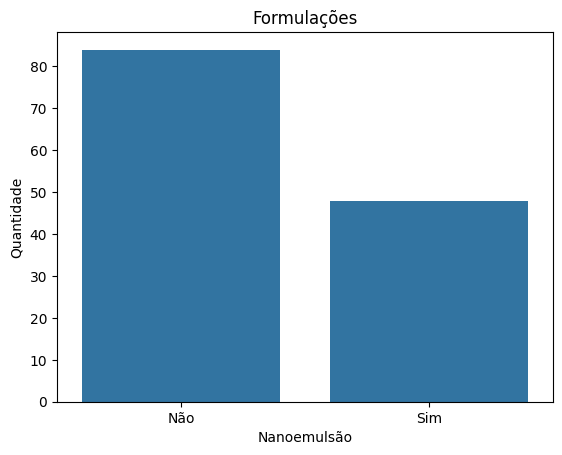

In [286]:
df['formou_nano'] = df.apply(lambda x:1 if (x['pdi'] <= PDI_CORTE_NANO) and (x['tamanho'] <= TAMANHO_CORTE_NANO) else 0, axis=1)
df_temp = df['formou_nano'].value_counts().reset_index()

plt.Figure()
plt.title("Formulações")
sns.barplot(df_temp, x='formou_nano', y='count')
plt.xticks(ticks=[0, 1], labels=['Não', 'Sim'])
plt.xlabel("Nanoemulsão")
plt.ylabel("Quantidade")
plt.show()

In [287]:
print(df_temp)

   formou_nano  count
0            0     84
1            1     48


# Normalização dos Dados

In [288]:
colunas = [col for col in df.columns if 'perc_' in col]
for col in colunas:
    if 'perc_lipidio' in col:
        continue
    if '1' in col:
        df['norm_' + col] = (df['perc_lipidio1'] / 100)  * df[col]
    else:            
        df['norm_' + col] = (df['perc_lipidio2']/ 100) * df[col]


In [289]:
colunas_normalizadas = [col for col in df.columns if 'norm_' in col]
colunas_normalizadas.extend(['tamanho', 'pdi','lipidio1', 'perc_lipidio1', 'lipidio2', 'perc_lipidio2', 'formou_nano'])

df[colunas_normalizadas].head()

,norm_perc_tensoativo,norm_perc_ac_palmitico1,norm_perc_ac_estearico1,norm_perc_ac_oleico1,norm_perc_ac_linoleico1,norm_perc_ac_vacenico1,norm_perc_ac_linolenico1,norm_perc_ac_caprilico1,norm_perc_ac_caprico1,norm_perc_ac_laurico1,...,norm_perc_outros2,norm_perc_ag_saturados2,norm_perc_ag_insaturados2,tamanho,pdi,lipidio1,perc_lipidio1,lipidio2,perc_lipidio2,formou_nano
0,12.500000,1.87500,0.500,2.2500,0.0,0.0,0.87500,0.2500,0.37500,12.37500,...,0.0,6.7500,18.2500,31.49,0.104,Manteiga de Tucumã,25.00,Óleo de Tucumã,25.00,1
1,16.675000,1.24875,0.333,1.4985,0.0,0.0,0.58275,0.1665,0.24975,8.24175,...,0.0,13.5000,36.5000,91.71,0.131,Manteiga de Tucumã,16.65,Óleo de Tucumã,50.00,1
2,5.552775,3.75000,1.000,4.5000,0.0,0.0,1.75000,0.5000,0.75000,24.75000,...,0.0,4.4955,12.1545,87.85,0.135,Manteiga de Tucumã,50.00,Óleo de Tucumã,16.65,1
3,9.375000,2.81250,0.750,3.3750,0.0,0.0,1.31250,0.3750,0.56250,18.56250,...,0.0,10.1250,27.3750,105.20,0.252,Manteiga de Tucumã,37.50,Óleo de Tucumã,37.50,1
4,12.500000,1.87500,0.500,2.2500,0.0,0.0,0.87500,0.2500,0.37500,12.37500,...,0.0,13.5000,36.5000,150.00,0.299,Manteiga de Tucumã,25.00,Óleo de Tucumã,50.00,1


# Correlações

In [290]:
df_corr = df[colunas_normalizadas].corr(numeric_only=True)

### TOP 10 colunas com correlação NEGATIVA mais forte com o PDI
Correlação negativa implica que, quanto maior o valor da variável, MENOR será o PDI

In [291]:
correlacoes = df_corr

# Seleciona apenas a coluna 'pdi', exceto ele mesmo
correlacoes_pdi = correlacoes['pdi'].drop(['pdi', 'formou_nano', 'tamanho'])

# Ordena do mais negativo para o menos
correlacoes_negativas = correlacoes_pdi.sort_values()
top_10_negativas = correlacoes_negativas.head(10).index.to_list()
top_10_negativas.append('pdi')


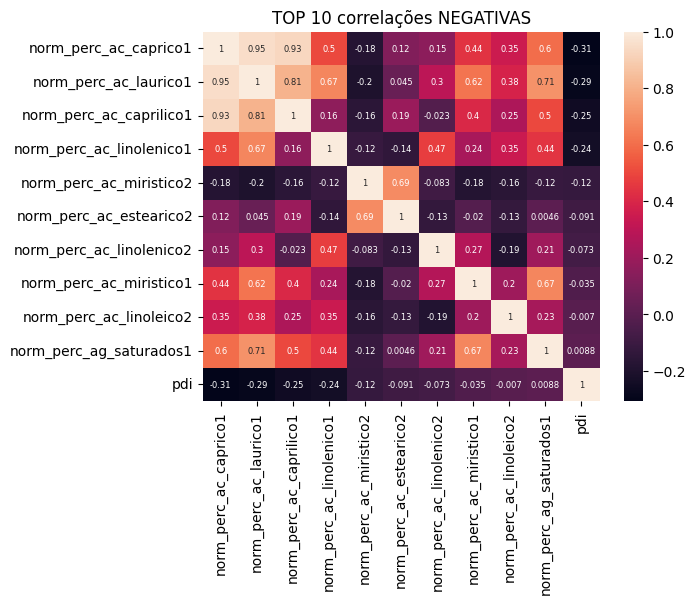

In [292]:
plt.figure()
plt.title("TOP 10 correlações NEGATIVAS")
sns.heatmap(df[top_10_negativas].corr(), annot=True, annot_kws={"size": 6})


plt.show()

### TOP 10 colunas com correlação POSITIVA mais forte com o PDI
Correlação positiva implica que, quanto maior o valor da variável, MAIOR será o PDI

In [293]:
correlacoes = df_corr

# Seleciona apenas a coluna 'pdi', exceto ele mesmo
correlacoes_pdi = correlacoes['pdi'].drop(['pdi', 'formou_nano', 'tamanho'])

# Ordena do mais negativo para o menos
correlacoes_positivas = correlacoes_pdi.sort_values(ascending=False)
top_10_positivas = correlacoes_positivas.head(10).index.to_list()
top_10_positivas.append('pdi')

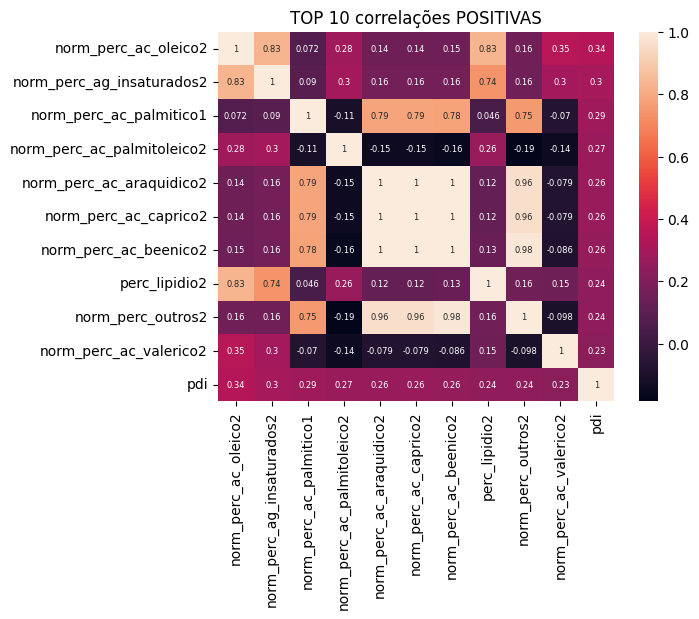

In [294]:
plt.figure()
plt.title("TOP 10 correlações POSITIVAS")
sns.heatmap(df[top_10_positivas].corr(), annot=True, annot_kws={"size": 6})

plt.show()

# Predição
Vamos testar a presição com as colunas abaixo:

In [295]:
from sklearn.preprocessing import LabelEncoder
df['lipidio1_id'] = LabelEncoder().fit_transform(df['lipidio1'])
df['lipidio2_id'] = LabelEncoder().fit_transform(df['lipidio2'])

colunas_normalizadas = [col for col in colunas_normalizadas if col not in ['lipidio1', 'lipidio2']]
print(colunas_normalizadas)

['norm_perc_tensoativo', 'norm_perc_ac_palmitico1', 'norm_perc_ac_estearico1', 'norm_perc_ac_oleico1', 'norm_perc_ac_linoleico1', 'norm_perc_ac_vacenico1', 'norm_perc_ac_linolenico1', 'norm_perc_ac_caprilico1', 'norm_perc_ac_caprico1', 'norm_perc_ac_laurico1', 'norm_perc_ac_miristico1', 'norm_perc_ac_palmitoleico1', 'norm_perc_ac_beenico1', 'norm_perc_ac_valerico1', 'norm_perc_ac_araquidico1', 'norm_perc_outros1', 'norm_perc_ag_saturados1', 'norm_perc_ag_insaturados1', 'norm_perc_ac_palmitico2', 'norm_perc_ac_estearico2', 'norm_perc_ac_oleico2', 'norm_perc_ac_linoleico2', 'norm_perc_ac_vacenico2', 'norm_perc_ac_linolenico2', 'norm_perc_ac_caprilico2', 'norm_perc_ac_caprico2', 'norm_perc_ac_laurico2', 'norm_perc_ac_miristico2', 'norm_perc_ac_palmitoleico2', 'norm_perc_ac_beenico2', 'norm_perc_ac_valerico2', 'norm_perc_ac_araquidico2', 'norm_perc_outros2', 'norm_perc_ag_saturados2', 'norm_perc_ag_insaturados2', 'tamanho', 'pdi', 'perc_lipidio1', 'perc_lipidio2', 'formou_nano']


In [296]:
from sklearn.metrics import confusion_matrix


def show_confusion_matrix(modelo, y_test, y_pred):
    labels = ['Não', 'Sim']
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
    plt.xlabel('Valor Predito')
    plt.ylabel('Valor Real')
    plt.title(f'Matriz de Confusão: {modelo}')
    plt.show()

In [297]:
# Separar features e target
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split


X = df[colunas_normalizadas].drop(columns=["formou_nano", "tamanho"])
y = df["formou_nano"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



🔍 Modelo: Random Forest
	f1 score: 0.6667	 acurácia: 0.7170	

🔍 Modelo: Logistic Regression
	f1 score: 0.7500	 acurácia: 0.7736	

🔍 Modelo: SVM (RBF)
	f1 score: 0.6047	 acurácia: 0.6792	

🔍 Modelo: KNN
	f1 score: 0.5957	 acurácia: 0.6415	

🔍 Modelo: Gradient Boosting
	f1 score: 0.7273	 acurácia: 0.7736	

🔍 Modelo: XGBoost
	f1 score: 0.7556	 acurácia: 0.7925	

🏆 Melhor modelo: XGBoost
Acurácia: 0.7925
F1-score: 0.7556


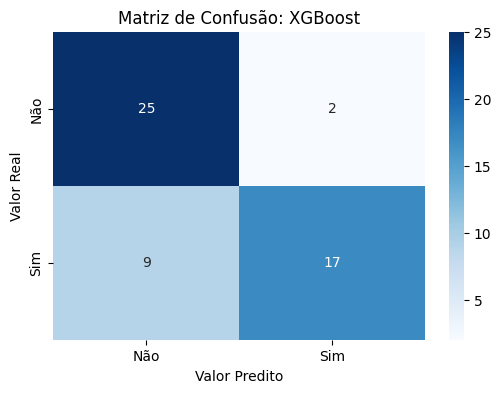

In [298]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


# Dicionário de modelos
modelos = {
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "Logistic Regression": LogisticRegression(),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=RANDOM_STATE)
}

# Resultados
resultados = []

# Loop de avaliação
for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    resultados.append({
        'modelo': nome,
        'acuracia': acc,
        'f1_score': f1,
        'y_pred': y_pred,
        'modelo_treinado': modelo
    })

    print(f"\n🔍 Modelo: {nome}\n\tf1 score: {f1:.4f}\t acurácia: {acc:.4f}\t")

# Ordena os resultados pelo F1-score (ou outra métrica que quiser)
resultados_ordenados = sorted(resultados, key=lambda x: x['f1_score'], reverse=True)
melhor = resultados_ordenados[0]

# 🔝 Destaque do melhor modelo
print("\n" + "="*50)
print(f"🏆 Melhor modelo: {melhor['modelo']}")
print(f"Acurácia: {melhor['acuracia']:.4f}")
print(f"F1-score: {melhor['f1_score']:.4f}")
print("="*50)

show_confusion_matrix(melhor['modelo'], y_test, melhor['y_pred'])

In [299]:
df['formou_nano'].value_counts()


formou_nano
0    84
1    48
Name: count, dtype: int64